# CO2 and Greenhouse Gas Emissions Project
**Research question**; aims to assess the recent evolution of carbon emissions around the world. 


- Which country has the greatest rate of decline? 
- And which country has the least rate of decline? 
- Do some regions stand out?
- What reasons can explain it? 



Introduction and Cleaning
Research questions
what the dataset contains: year, country, gdp, co2 per gdp, population, ghg
 
 
General information about dataset
Général trend in time
Régions
Main correlations 
 
Paris agreements: 
Focus china USA 
1 event in the USA : trump withdrawal is bad news for climate 
1 event In china : Xi endorsement is good news 
Analyse the evolution of the data based on these events.

**Responsibilities of each team member are stated as follow**:

- Daphne Werring: Section 1 (Introduction) and Section 2 (General Analysis);
- Ke Shen: Section 3 (The Particular Influence of the Paris Agreement on the US and China);
- Mathis Guerreiro: Section 4 (Prediction of the Missing Values with Linear Regression);

#1 Introducing the Dataset
To answer these questions, we will use the dataset ‘Data on C02 and Greenhouse Gas Emissions by Our World in Data’. This platform founded by Max Roser focuses on large global problems such as climate change and existential risk (https://ourworldindata.org/about). All visualisations, data and code produced by Our World in Data are open access under the Creative Commons By license (https://github.com/owid/co2-data).

The data in this set has been “collected, aggregated, and documented by Hannah Ritchie, Max Roser, Edouard Mathieu, Bobbie Macdonald and Pablo Rosado” (https://github.com/owid/co2-data). Furthermore, the set is a regularly updated collection of key metrics and includes data on CO2 Emissions, other greenhouse gases, energy mix and other relevant metrics (https://github.com/owid/co2-data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

In [3]:
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [4]:
df.tail()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN
25988,ZWE,Zimbabwe,2020,10.531,0.709,NaN,0.697,0.047,6.257,0.421,...,NaN,NaN,NaN,NaN,NaN,14862927.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25989 entries, 0 to 25988
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21960 non-null  object 
 1   country                              25989 non-null  object 
 2   year                                 25989 non-null  int64  
 3   co2                                  24670 non-null  float64
 4   co2_per_capita                       24032 non-null  float64
 5   trade_co2                            4096 non-null   float64
 6   cement_co2                           12668 non-null  float64
 7   cement_co2_per_capita                12638 non-null  float64
 8   coal_co2                             17909 non-null  float64
 9   coal_co2_per_capita                  17536 non-null  float64
 10  flaring_co2                          4641 non-null   float64
 11  flaring_co2_per_capita      

In [6]:
df.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25989.000000,24670.000000,24032.000000,4096.000000,12668.000000,12638.000000,17909.000000,17536.000000,4641.000000,4640.000000,...,5651.000000,5655.000000,5655.000000,5655.000000,5655.000000,2.289200e+04,1.346900e+04,9345.000000,9300.000000,7149.000000
mean,1952.168225,326.658348,4.115845,-8.124470,15.853638,0.111586,212.296783,1.543364,17.691973,0.829055,...,6.870665,79.072368,1.902152,29.088635,0.601973,7.068041e+07,2.889570e+11,1425.651569,24469.973841,1.805888
std,54.592939,1677.027130,14.700552,262.090605,84.179826,0.147534,863.287148,2.524852,42.421165,5.326217,...,7.270324,545.014528,3.318293,198.147748,0.890161,3.794737e+08,2.185600e+12,8750.538123,32096.347648,1.779325
min,1750.000000,0.000000,0.000000,-2232.999000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.078000
25%,1922.000000,0.557000,0.253000,-1.663750,0.134000,0.019000,0.359000,0.056000,0.288000,0.020000,...,2.095500,2.005000,0.691000,0.510000,0.221000,1.287425e+06,9.790110e+09,6.440000,3067.494750,0.859000
50%,1966.000000,5.333000,1.226000,1.874500,0.603000,0.068000,4.540000,0.441500,2.396000,0.064000,...,4.442000,8.530000,1.077000,3.460000,0.377000,4.869928e+06,3.044678e+10,54.352000,12983.272000,1.309000
75%,1994.000000,48.153250,4.612250,9.700500,3.255000,0.155000,42.086000,2.141000,15.718000,0.180000,...,8.975000,30.025000,1.619000,11.195000,0.589000,1.757624e+07,1.274622e+11,326.727000,34081.015500,2.203000
max,2020.000000,36702.503000,748.639000,2047.575000,1626.371000,2.738000,15062.902000,34.184000,435.034000,94.711000,...,53.650000,8298.270000,39.795000,3078.270000,10.056000,7.794799e+09,1.136302e+14,161530.754000,308704.252000,25.253000


In [7]:
df.nunique()

iso_code                                 219
country                                  248
year                                     271
co2                                    14658
co2_per_capita                          8723
trade_co2                               3723
cement_co2                              5151
cement_co2_per_capita                    698
coal_co2                               10259
coal_co2_per_capita                     4993
flaring_co2                             3000
flaring_co2_per_capita                   955
gas_co2                                 6102
gas_co2_per_capita                      3003
oil_co2                                10497
oil_co2_per_capita                      5913
other_industry_co2                      1533
other_co2_per_capita                     244
co2_growth_prct                         5824
co2_growth_abs                          9040
co2_per_gdp                             1767
co2_per_unit_energy                      644
consumptio

In [8]:
country_grp = df.groupby(['country'])

The main variables we work with are:

* `Country`: Geographic location
* `Year`: Year of Observation
* `GDP`: Gross domestic product measured in international dollar using 2011 prices to adjust for price changes over time (inflation) and price differences between countries. Calculated by multiplying GDP per capita with population.
* `Population`: Population by country, available from 1800 to 2021 based on Gapminder data, HYDE, and UN Population Division (2019) estimates.
* `CO2`: Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
* `CO2 per GDP`: Annual production-based emissions of carbon dioxide (CO2), measured in kilograms per dollar of GDP (2011 international-$). Production-based emissions are based on territorial emissions, which do not account for emissions embedded in traded goods.
* `Total GHG`: Total greenhouse gas emissions including land-use change and forestry, measured in million tonnes of carbon dioxide-equivalents.


As a group they will be defined as df_main
-> The definitions are explained by the dataset. 

In [9]:
df_main = df[['country', 'year','gdp', 'co2', 'population', 'co2_per_gdp', 'total_ghg']]

In [10]:
df_1 = df[['country', 'year','gdp', 'co2', 'population', 'co2_per_gdp', 'total_ghg']]

## 1.1 Outliers
From the decription of sales and artworks datasets, we can see that there is a huge discrepency between standard deviation in the GPD and it's maximum value. Let's analyse this through a boxplot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


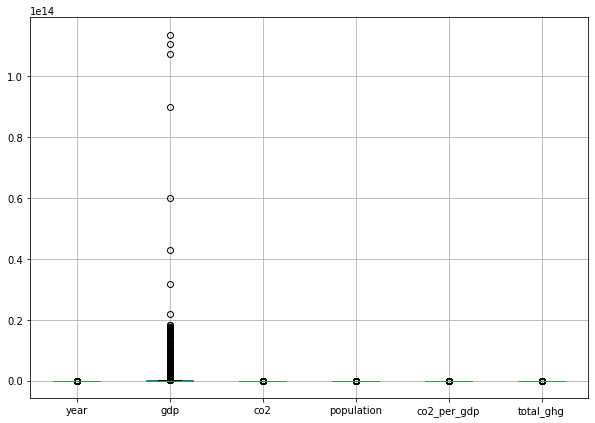

In [11]:
fig = plt.figure(figsize =(10, 7))
df_main.boxplot()

The GDP appears to have the largest deviation. GDP is related directly to countries, maybe there are large countries that have enourmous outliers. Let's check the countries in the list.

In [12]:
df.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'EU-27', 'Ecuador',
       'Egypt', 'El Salvador', 'Equa

The Data-set appears to already contain regions and economic catagories. For the general analysis, these would have to be filtered out.

##1.2 Create Regions
To perform the general analysis, I will create subsections of regions to propperly analyse. 


Divide into regions as named in the dataset;
- "North America"
- "South America"
- "Europe"
- "Africa"
- "Asia"
- "Oceania"


And economically;
- "High-income countries"
- "Lower-middle-income countries"
- "Low-income countries"

And as a whole;
- "World"


In [13]:
#starting with the continental regions
df_northamerica = df_main[df_main['country'].isin(["North America"])]
df_southamerica = df_main[df_main['country'].isin(["South America"])]
df_europe = df_main[df_main['country'].isin(["Europe"])]
df_africa = df_main[df_main['country'].isin(["Africa"])]
df_asia = df_main[df_main['country'].isin(["Asia"])]
df_oceania = df_main[df_main['country'].isin(["Oceania"])]

In [14]:
#economical regions
df_highincome = df_main[df_main['country'].isin(["High-income countries"])]
df_lowermiddle = df_main[df_main['country'].isin(["Lower-middle-income countries"])]
df_lowincome = df_main[df_main['country'].isin(["Low-income countries"])]

In [15]:
#and the world
df_world = df_main[df_main['country'].isin(["World"])]

In [16]:
#and the continental data version
df_worldcontinent = df_main[df_main['country'].isin(["North America","South America","Europe", "Africa","Asia","Oceania"])]

In [17]:
#and the clean countries list data version
df_countries = df_main[~df_main['country'].isin(["North America","South America","Europe", "Africa","Asia","Oceania", "High-income countries", 
                                                 "World", "Upper-middle-income countries", "High-income countries", 
                                                 "Asia (excl. China & India)", "Lower-middle-income countries" , "European Union (27)", 
                                                 "European Union (28)","Europe (excl. EU-27)", "Europe (excl. EU-28)", "North America (excl. USA)", "International transport"])]

#2 General Analysis
The general analysis will commence in the field of Carbon Dioxide (CO2) emissions. CO2 makes up the vast majority of greenhouse gas emissions from the sector. Followed by smaller amounts of methane and nitrous oxide, these gasses are released during the combustion of fossil fuels. ([EPA, 2020 ](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions#:~:text=Carbon%20dioxide%20(CO2)%20makes,natural%20gas%2C%20to%20produce%20electricity.)) Although the latter are also included in the data set, the general analysis will mostly focus on C02. 

##2.1 Trends on World Level
Let’s look for correlations in the main categories on world level. For this analysis I use the predefined df_world as I want to include all countries and not compare regions.

In [18]:
correlation = df_world.corr()

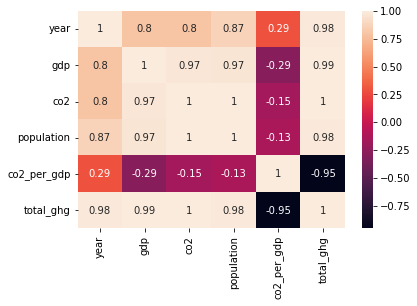

In [19]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns
            ,annot=True)

When the variables in the heatmap show minimum difference and the on the graph appears straight, we are talking about a very strong correlation. The highest correlation number is 1.0 which means all dots on the graph are aligned perfectly. 

Based on the heatmap above we can make some observations;
- This chart shows signs of a very high correlation
- A perfect positive correlation (1) between **CO2** and **greenhouse gases**, as CO2 is the primary greenhouse gas, this does not come as a surprise. It could be of interest to track the development of the other greenhouse gasses and see if they correlate as well. 
- Almost perfect positive correlation (0.98)  between **total greenhouse gases** and **year**. This would indicate a steady growth in greenhouse gases over the years. 
- Almost perfect positive correlation (0.97) between **GDP** and **C02**, indicating that as the wealth rises, so does the pollution. 
- Interestingly there is also an almost perfect correlation (0.97) between **population** and **GDP**, even though this is not relevant to the analyses. 
- The **c02** per **GDP** evokes a negative correlation in every category with an extreme negative correlation in total Greenhouse Gasses. Hypothetically this could relate to increased wealth causing a decrease in the total GHG, but the low availability of data (as seen in the pair plot makes this assumption less likely. 

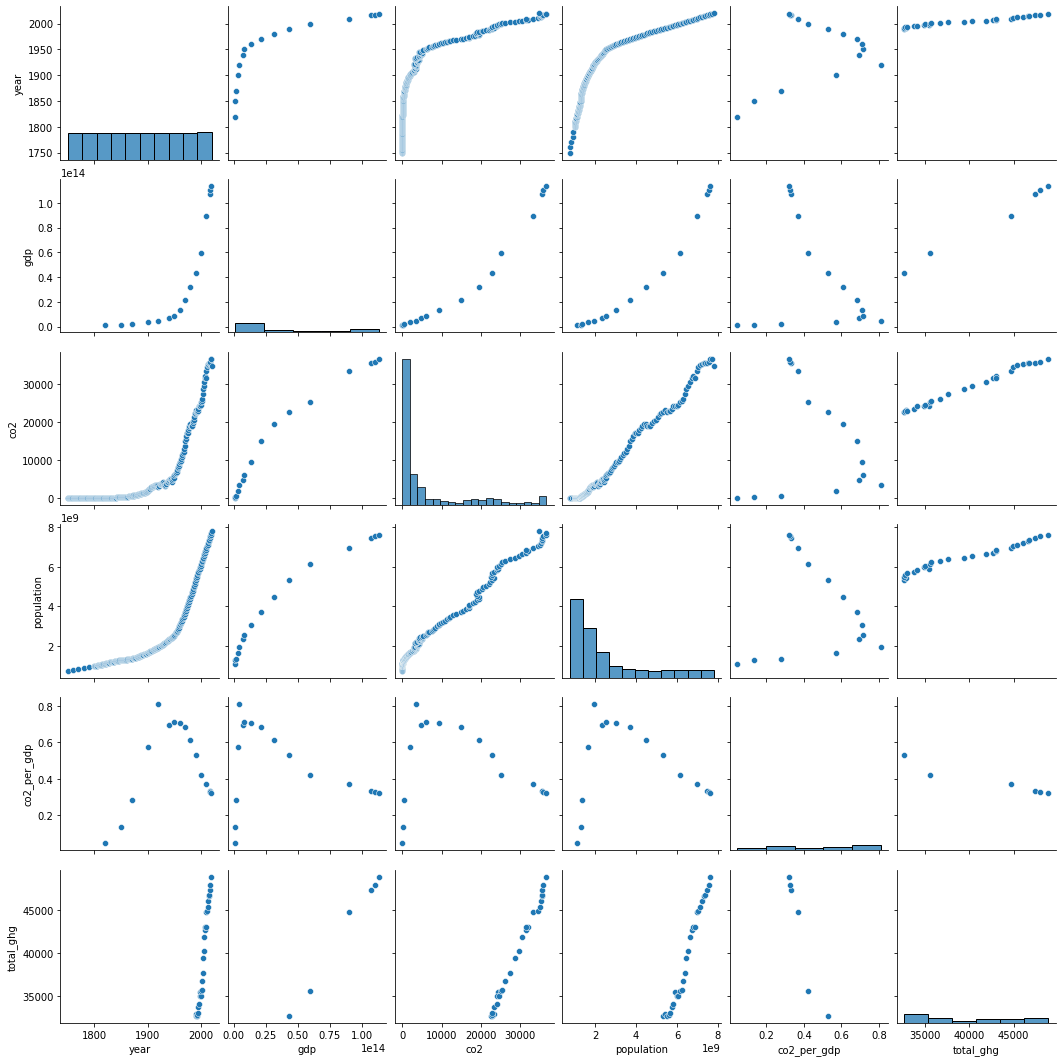

In [20]:
sns.pairplot(df_world)

This Pairplot indicates correlations between the world, population and C02 polution.

##2.2 Trend per regionional level
Let's start of with an overview of all the continents of the world. Asia immediately springs out as the largest polutor in C02 emmission. Their trend does however start later as North America and Europe. Ocieania, South America and Africa together produce less C02 Emissions as Europe. Europe has gone through the earliest rise and biggest decline. 

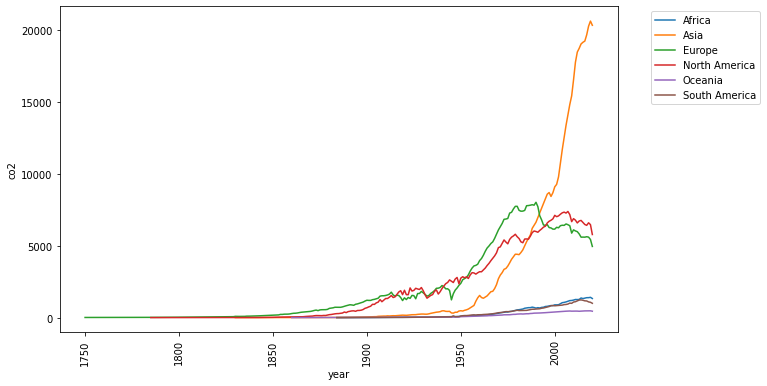

In [21]:
# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2', data=df_worldcontinent, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Let's start of with an overview of all the continents of the world. Asia immediately springs out as the largest polutor in C02 emmission. Their trend does however start later as North America and Europe. Ocieania, South America and Africa together produce less C02 emissions as Europe. Europe has gone through the earliest rise and biggest decline. 


Let's zoom in further on the trend per region.

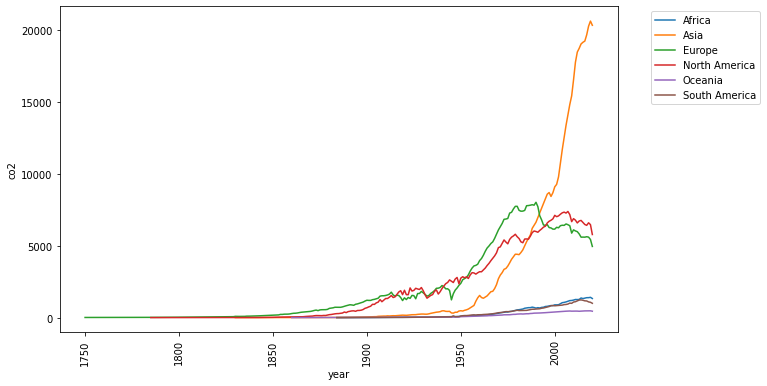

In [22]:
# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2', data=df_worldcontinent, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

##2.3 Main CO2 Polluters
Let's start of with an overview of all the continents of the world. Asia immediately springs out as the largest polutor in C02 emmission. Their trend does however start later as North America and Europe. Ocieania, South America and Africa together produce less C02 Emissions as Europe. Europe has gone through the earliest rise and biggest decline. 

In [23]:
df_co2_2020_world = df_worldcontinent[df_worldcontinent.year == 2020]
df_co2_2020_world = df_co2_2020_world.sort_values(by=['co2'], ascending=False)
df_co2_2020_world.head(50)

,country,year,gdp,co2,population,co2_per_gdp,total_ghg
1243,Asia,2020,NaN,20317.058,4.639847e+09,NaN,NaN
17020,North America,2020,NaN,5775.159,5.920623e+08,NaN,NaN
7301,Europe,2020,NaN,4946.034,7.488434e+08,NaN,NaN
208,Africa,2020,NaN,1326.044,1.340598e+09,NaN,NaN
21474,South America,2020,NaN,994.160,4.307598e+08,NaN,NaN
17861,Oceania,2020,NaN,444.571,4.267781e+07,NaN,NaN


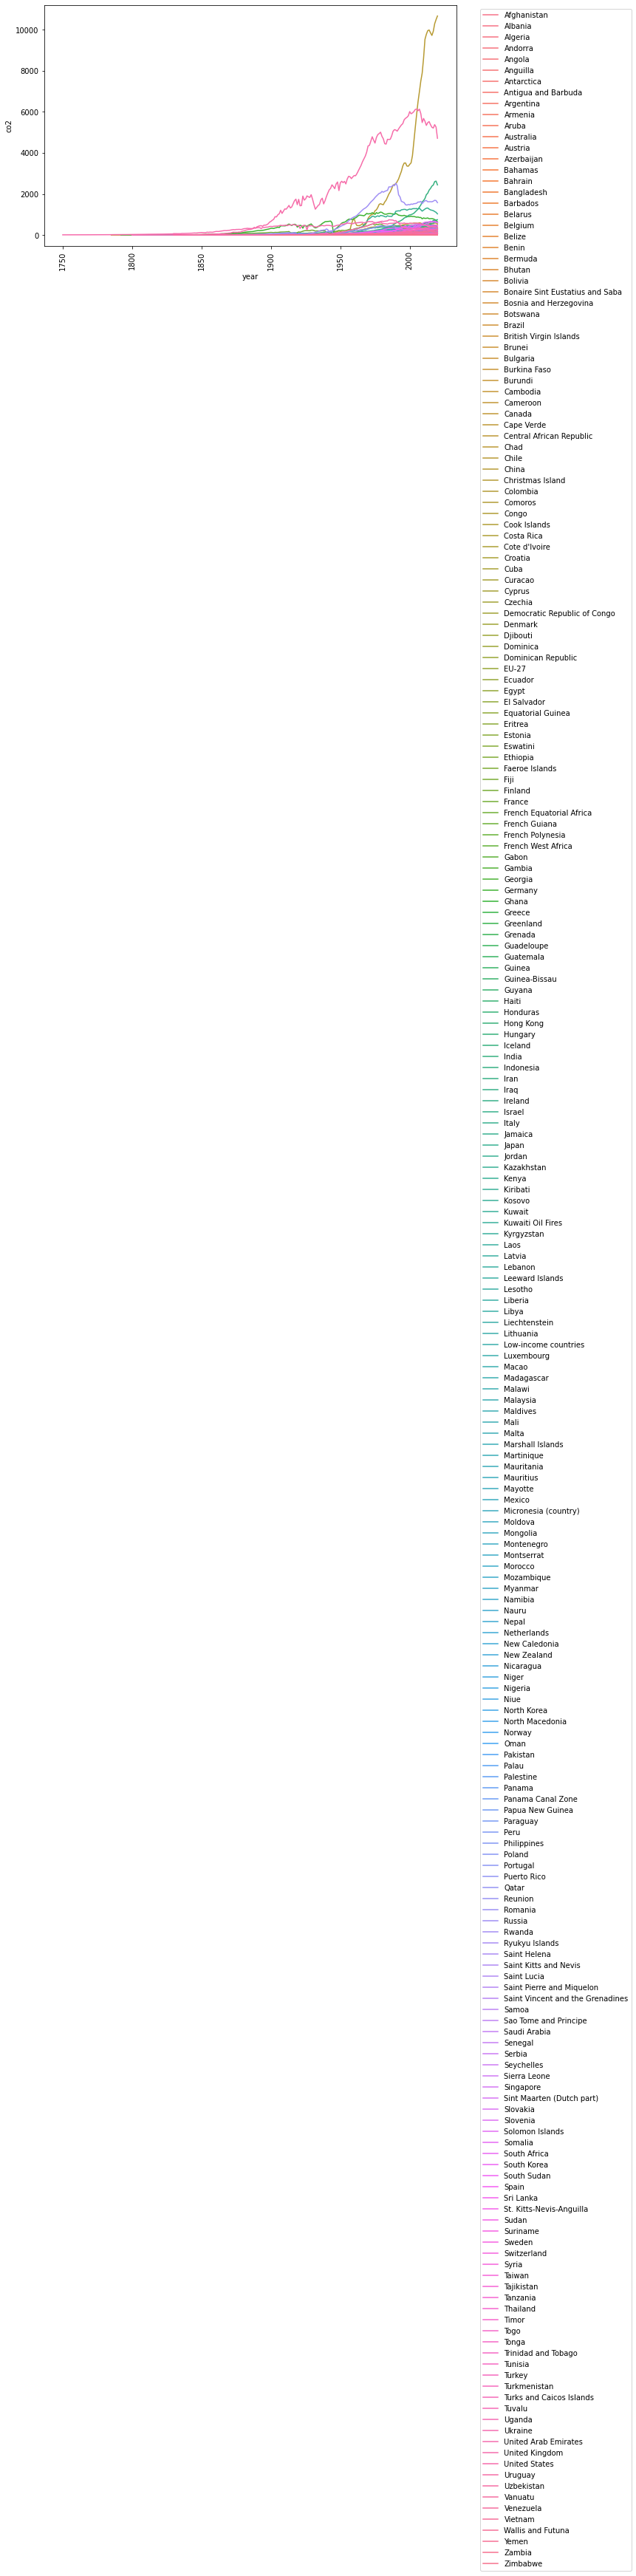

In [24]:
# plot with seaborn and use the hue parameter
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2', data=df_countries, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

This is not clear, the list is to big and the colours are to many to propperly identify the largest (or least) polluter. 

In [25]:
df_co2_2020_countries = df_countries[df_countries.year == 2020]
df_co2_2020_countries = df_co2_2020_countries.sort_values(by=['co2'], ascending=False)
df_co2_2020_countries.head(50)

,country,year,gdp,co2,population,co2_per_gdp,total_ghg
4723,China,2020,NaN,10667.887,1.439324e+09,NaN,NaN
24661,United States,2020,NaN,4712.771,3.310026e+08,NaN,NaN
11277,India,2020,NaN,2441.792,1.380004e+09,NaN,NaN
19597,Russia,2020,NaN,1577.136,1.459345e+08,NaN,NaN
12336,Japan,2020,NaN,1030.775,1.264765e+08,NaN,NaN
11595,Iran,2020,NaN,745.035,8.399295e+07,NaN,NaN
9619,Germany,2020,NaN,644.310,8.378394e+07,NaN,NaN
20269,Saudi Arabia,2020,NaN,625.508,3.481387e+07,NaN,NaN
21590,South Korea,2020,NaN,597.605,5.126918e+07,NaN,NaN
11409,Indonesia,2020,NaN,589.500,2.735236e+08,NaN,NaN


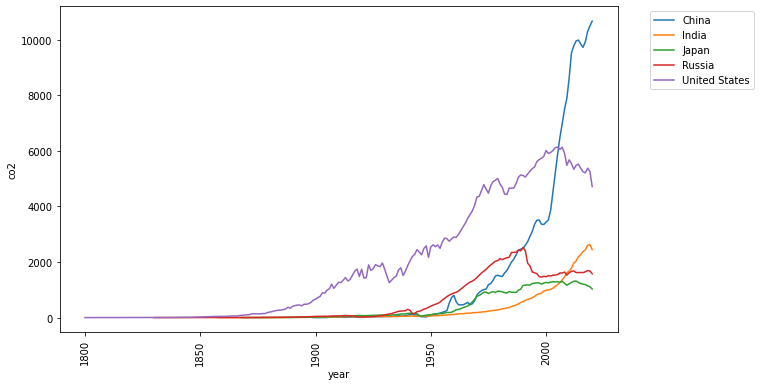

In [26]:
# plot with seaborn and use the hue parameter
df_mainpoluters = df_main[df_main['country'].isin(["United States", "India", "China", "Russia", "Japan"])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2', data=df_mainpoluters, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

The largest polluters are China, the United States, India, Russia and Japan. All countries are in a decline except for China. Although in the case of Rusia and India, it is a very small decline. Japan has been in a decline since the 2000s, although this decline is very slow and pared with ups and downs. Japan is the smallest country on the list and a large polluter compared to its population. 

##2.4 Smallest Green House Gasses Polluters
The next step is to look at the smallest Pollutors. 

In [27]:
df_co2_2020_countries = df_countries[df_countries.year == 2020]
df_co2_2020_countries = df_co2_2020_countries.sort_values(by=['co2'], ascending=True)
df_co2_2020_countries.head(50)

,country,year,gdp,co2,population,co2_per_gdp,total_ghg
23845,Tuvalu,2020,NaN,0.008,11792.0,NaN,NaN
19790,Saint Helena,2020,NaN,0.009,6071.0,NaN,NaN
16784,Niue,2020,NaN,0.011,1618.0,NaN,NaN
15658,Montserrat,2020,NaN,0.025,4999.0,NaN,NaN
25457,Wallis and Futuna,2020,NaN,0.026,11246.0,NaN,NaN
19972,Saint Pierre and Miquelon,2020,NaN,0.051,5795.0,NaN,NaN
16026,Nauru,2020,NaN,0.057,10834.0,NaN,NaN
12729,Kiribati,2020,NaN,0.068,119446.0,NaN,NaN
5050,Cook Islands,2020,NaN,0.079,17564.0,NaN,NaN
20184,Sao Tome and Principe,2020,NaN,0.113,219161.0,NaN,NaN


Let's take a closer look at the increase of the lowest polutors with a population of over 100.000. 

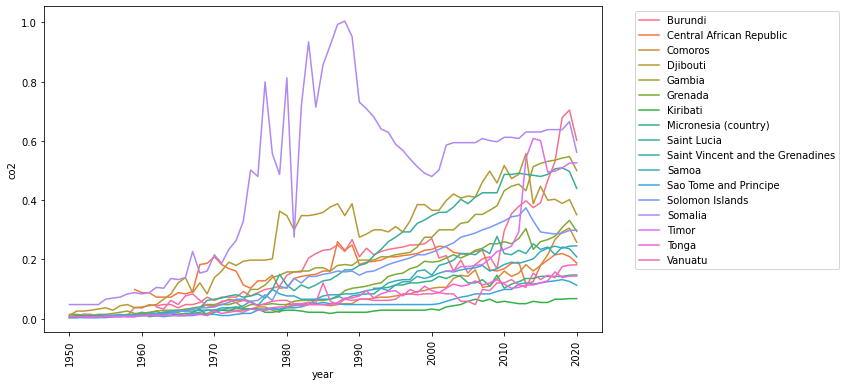

In [28]:
df_mainpoluters = df_main[df_main['country'].isin(["Kiribati", "Sao Tome and Principe", "Tonga", "Micronesia (country)", 
                                                   "Vanuatu", "Central African Republic", "Saint Vincent and the Grenadines",
                                                   "Samoa", "Comoros", "Guinea-Bisseau", "Grenada", "Solomon Islands", "Moyette", "Djibouti",
                                                   "Saint Lucia", "Gambia", "Timor", "Somalia", "Burundi"])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2', data=df_mainpoluters, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Although there is a slicht upwards trend among the smallest pollutors,  these trends are paired with extreme up and downs. In the case of the Central African Republic which has a population of 4,83 million this low pollution is likely related to it’s low GDP. The same argument could be made for Somalia’s changing emissions.  Let's check the CO2 per GDP. 

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]), <a list of 10 Text major ticklabel objects>)

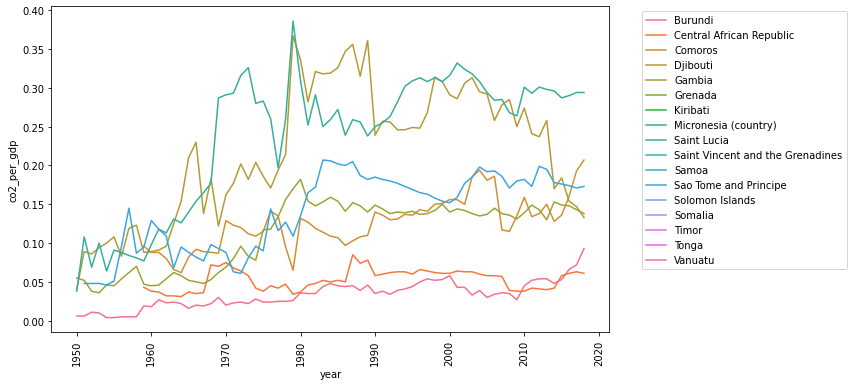

In [29]:
df_mainpoluters = df_main[df_main['country'].isin(["Kiribati", "Sao Tome and Principe", "Tonga", "Micronesia (country)", 
                                                   "Vanuatu", "Central African Republic", "Saint Vincent and the Grenadines",
                                                   "Samoa", "Comoros", "Guinea-Bisseau", "Grenada", "Solomon Islands", "Moyette", "Djibouti",
                                                   "Saint Lucia", "Gambia", "Timor", "Somalia", "Burundi"])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2_per_gdp', data=df_mainpoluters, hue='country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

There is no data on CO2 per GPD availlable for Somalia. However, in the case of the Central African republic there are visible increases and decreases throughout the timeline. This could indicate an increase in wealth and prosperity. 

Interesting enough, there are no high GDP countries amoung the 50 lowest pollutors. And if there are, they are either very small (Liechtenstein), consisting of Islands (Micronesia) or a tax haven (Solomon Islands). 

##2.5 Pollution Sources
Total Greenhouse gasses consits of C02, Methane, Nitrous oxide and Fluorinated gases. The first three categories are within the dataset.  Let's explore in more detail.

In [30]:
df_pollution= df[['country', 'year','gdp', 'co2', 'population', 'co2_per_gdp', 'methane', 'nitrous_oxide','total_ghg']]

In [31]:
df_worldpollution = df_world = df_pollution[df_pollution['country'].isin(["World"])]

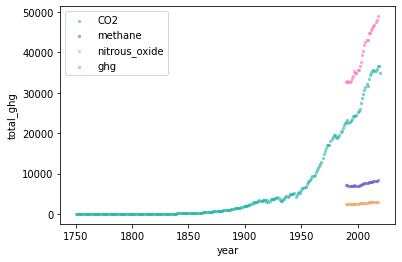

In [32]:
ax = df_worldpollution.plot(kind='scatter', x='year',y='co2', s=5, color = 'lightseagreen', alpha=0.5, label ='CO2');
df_worldpollution.plot(kind='scatter', x='year', y='methane', s=5, color= 'slateblue', alpha=0.5, label = 'methane', ax=ax)
df_worldpollution.plot(kind='scatter', x='year', y='nitrous_oxide', s=5, color= 'sandybrown', alpha=0.5, label = 'nitrous_oxide', ax=ax)
df_worldpollution.plot(kind='scatter', x='year', y='total_ghg', s=5, color= 'hotpink', alpha=0.5, label = 'ghg', ax=ax)
print(df_worldpollution.plot)

For the world as a whole the graph visualises how CO2 is indeed the main culprit, followed by methane and in third place, nitrous oxide. 

If we look at the countries individually, it is not suprising they follow aa similar trend. Most countries start a downward trend after the year 2000, would there be a historical cause for this?

In [33]:
df_countrypollution = df_countries = df_pollution[~df_pollution['country'].isin(["North America","South America","Europe", "Africa","Asia","Oceania", "High-income countries",
                                                "World", "Upper-middle-income countries", "High-income countries",
                                                "Asia (excl. China & India)", "Lower-middle-income countries" , "European Union (27)",
                                                "European Union (28)","Europe (excl. EU-27)", "Europe (excl. EU-28)", "North America (excl. USA)", "International transport"])]

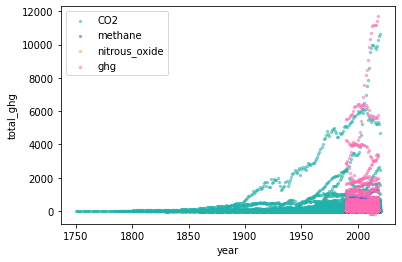

In [34]:
ax = df_countrypollution.plot(kind='scatter', x='year',y='co2', s=5, color = 'lightseagreen', alpha=0.5, label ='CO2');
df_countrypollution.plot(kind='scatter', x='year', y='methane', s=5, color= 'slateblue', alpha=0.5, label = 'methane', ax=ax)
df_countrypollution.plot(kind='scatter', x='year', y='nitrous_oxide', s=5, color= 'sandybrown', alpha=0.5, label = 'nitrous_oxide', ax=ax)
df_countrypollution.plot(kind='scatter', x='year', y='total_ghg', s=5, color= 'hotpink', alpha=0.5, label = 'ghg', ax=ax)
print(df_countrypollution.plot)

#3 Effects of The Paris Agreement (on the US and China)
The COP21 can be understood as an important milestone in the global fight against global warming. Not only did it set important objectives for the future of life on our planet, but it can also be seen as a catalyst point for the two main polluting countries of the world: the United States and China. 

In [35]:
# Select the wanted columns 
df_1 = df[['country','year','population','co2','co2_per_capita','trade_co2','total_ghg','gdp', 'energy_per_gdp']]

In [36]:
# Categorise the dataset by country
df_1.groupby('country')

In [37]:
# Extract data relevant to US
df_1.groupby('country').get_group('United States')

,country,year,population,co2,co2_per_capita,trade_co2,total_ghg,gdp,energy_per_gdp
24441,United States,1800,6000000.0,0.253,0.042,NaN,NaN,NaN,NaN
24442,United States,1801,6113782.0,0.267,0.044,NaN,NaN,NaN,NaN
24443,United States,1802,6229723.0,0.289,0.046,NaN,NaN,NaN,NaN
24444,United States,1803,6347862.0,0.297,0.047,NaN,NaN,NaN,NaN
24445,United States,1804,6468241.0,0.333,0.052,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24657,United States,2016,323015992.0,5248.024,16.247,328.696,5676.92,1.716256e+13,1.488
24658,United States,2017,325084758.0,5207.751,16.020,343.021,5613.64,1.759628e+13,1.456
24659,United States,2018,327096263.0,5375.491,16.434,351.120,5794.35,1.814065e+13,1.464
24660,United States,2019,329064917.0,5255.816,15.972,369.967,NaN,NaN,NaN


In [38]:
# Extract data relevant to China
df_1.groupby('country').get_group('China')

,country,year,population,co2,co2_per_capita,trade_co2,total_ghg,gdp,energy_per_gdp
4602,China,1899,3.994218e+08,0.095,0.000,NaN,NaN,NaN,NaN
4603,China,1900,4.015797e+08,NaN,NaN,NaN,NaN,3.888000e+11,NaN
4604,China,1901,4.037865e+08,NaN,NaN,NaN,NaN,NaN,NaN
4605,China,1902,4.060427e+08,0.095,0.000,NaN,NaN,NaN,NaN
4606,China,1903,4.083487e+08,1.964,0.005,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4719,China,2016,1.414049e+09,9720.444,6.874,-1020.027,11207.66,1.725547e+13,2.071
4720,China,2017,1.421022e+09,9920.459,6.981,-1031.782,11408.26,1.757508e+13,2.099
4721,China,2018,1.427648e+09,10289.990,7.208,-1004.922,11705.81,1.815162e+13,2.105
4722,China,2019,1.433784e+09,10489.989,7.316,-1047.154,NaN,NaN,NaN


Now group the dataframes by country:

In [39]:
df_US = df_1.groupby('country').get_group('United States')

In [40]:
df_CN = df_1.groupby('country').get_group('China')

## 3.1 The US

First, we examine trends in carbon emissions in the US post-2015.

In [41]:
df_USY = df_US.loc[df_US['year'] >= 2015]

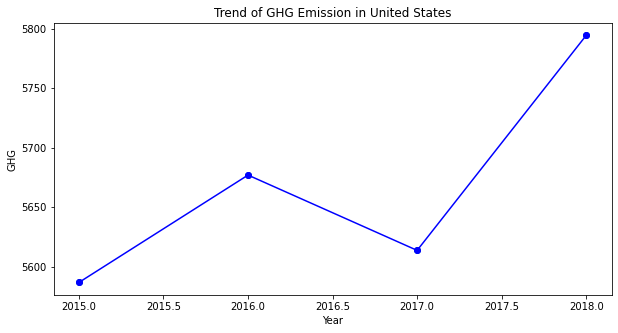

In [42]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.total_ghg)

# give a title to the plot
plt.title('Trend of GHG Emission in United States')

# give a label to the axes
plt.ylabel("GHG")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.total_ghg, 'ob-')
plt.show()

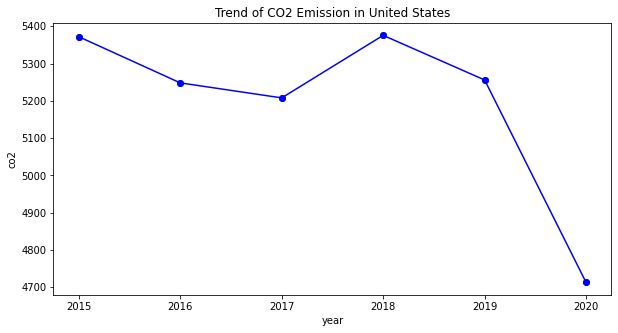

In [43]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.co2)

# give a title to the plot
plt.title('Trend of CO2 Emission in United States')

# give a label to the axes
plt.ylabel("co2")
plt.xlabel("year")
plt.plot(df_USY.year, df_USY.co2, 'ob-')
plt.show()

Then, we examine the trend in CO2 emission from 1950 to 2020.

In [44]:
df_USY = df_US.loc[df_US['year'] >= 1950]

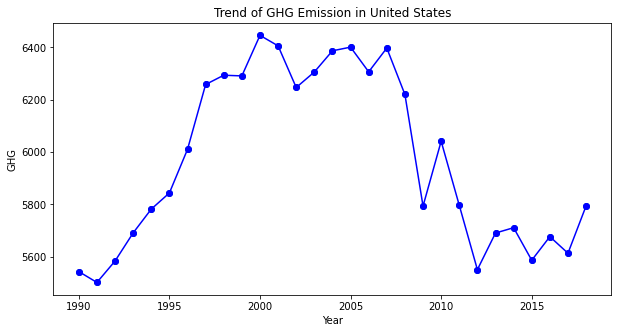

In [45]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.total_ghg)

# give a title to the plot
plt.title('Trend of GHG Emission in United States')

# give a label to the axes
plt.ylabel("GHG")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.total_ghg, 'ob-')
plt.show()

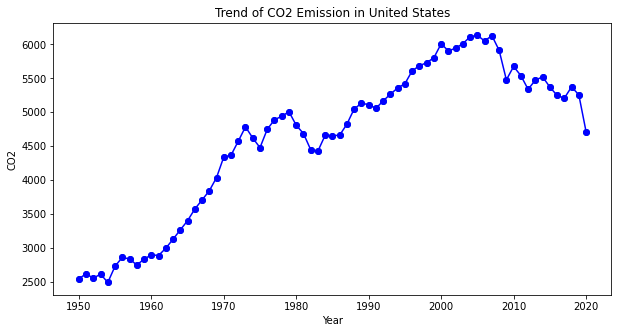

In [46]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.co2)

# give a title to the plot
plt.title('Trend of CO2 Emission in United States')

# give a label to the axes
plt.ylabel("CO2")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.co2, 'ob-')
plt.show()

## 3.2 China

The chronology of trend is the same as before. While to be noticed, we chose to examine the beginning year as 2005 becuase it is the start year of 11th Five-Year Plan (FYP) in China which take ecology into the consideration of national development.

In [47]:
df_CNY = df_CN.loc[df_CN['year'] >= 2005]

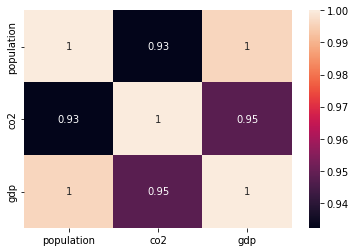

In [48]:
df_CN_1 = df_CNY[['population','co2','gdp']]
correlation = df_CN_1.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns
            ,annot=True)

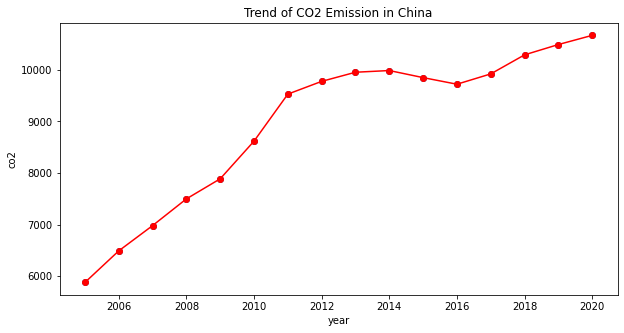

In [49]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_CNY.year, df_CNY.co2)

# give a title to the plot
plt.title('Trend of CO2 Emission in China')

# give a label to the axes
plt.ylabel("co2")
plt.xlabel("year")
plt.plot(df_CNY.year, df_CNY.co2, 'or-')
plt.show()

In [50]:
df_CNY = df_CN.loc[df_CN['year'] >= 1950]

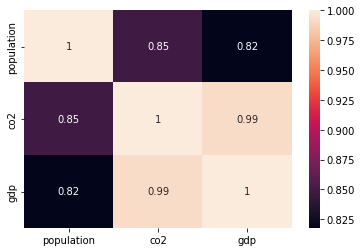

In [51]:
df_CN_1 = df_CNY[['population','co2','gdp']]
correlation = df_CN_1.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns
            ,annot=True)

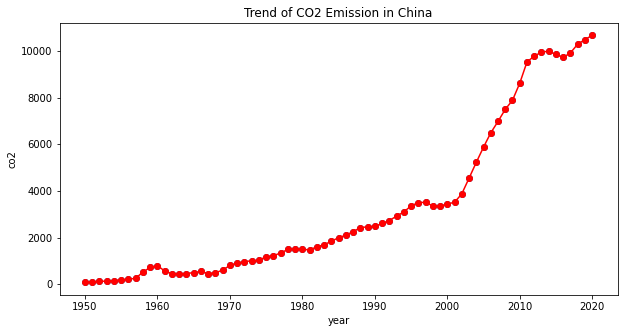

In [52]:
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_CNY.year, df_CNY.co2)

# give a title to the plot
plt.title('Trend of CO2 Emission in China')

# give a label to the axes
plt.ylabel("co2")
plt.xlabel("year")
plt.plot(df_CNY.year, df_CNY.co2, 'or-')
plt.show()

## 3.3 Comparison between the US and China

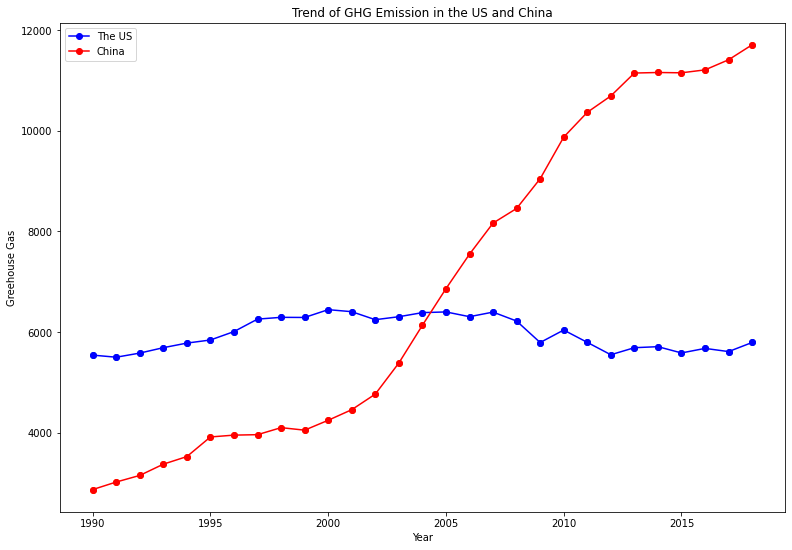

In [53]:
df_USY = df_US.loc[df_US['year'] >= 1950]
df_CNY = df_CN.loc[df_CN['year'] >= 1950]
%matplotlib inline
plt.figure(figsize=(13, 9))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.total_ghg)
plt.scatter(df_CNY.year, df_CNY.total_ghg)

# give a title to the plot
plt.title('Trend of GHG Emission in the US and China')

# give a label to the axes
plt.ylabel("Greehouse Gas")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.total_ghg, 'ob-', label = "The US")
plt.plot(df_CNY.year, df_CNY.total_ghg, 'or-', label = "China")
plt.legend()
plt.show()

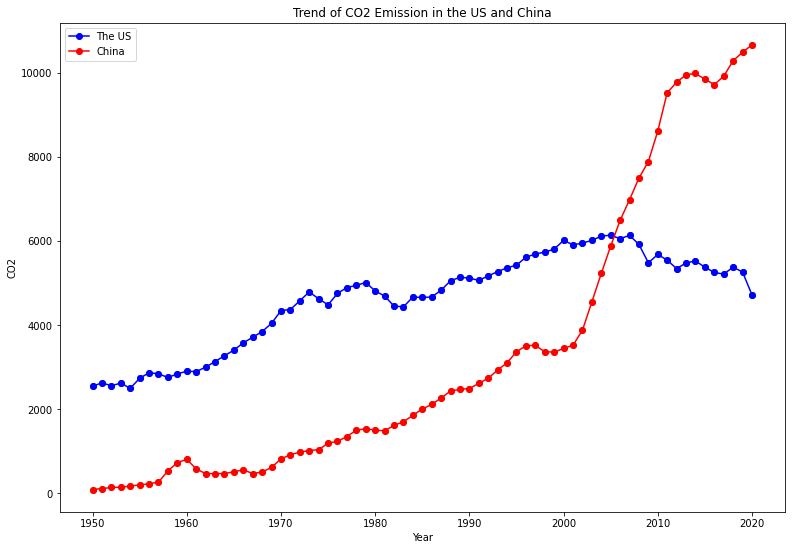

In [54]:
%matplotlib inline
plt.figure(figsize=(13, 9))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.co2)
plt.scatter(df_CNY.year, df_CNY.co2)

# give a title to the plot
plt.title('Trend of CO2 Emission in the US and China')

# give a label to the axes
plt.ylabel("CO2")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.co2, 'ob-', label = "The US")
plt.plot(df_CNY.year, df_CNY.co2, 'or-', label = "China")
plt.legend()
plt.show()

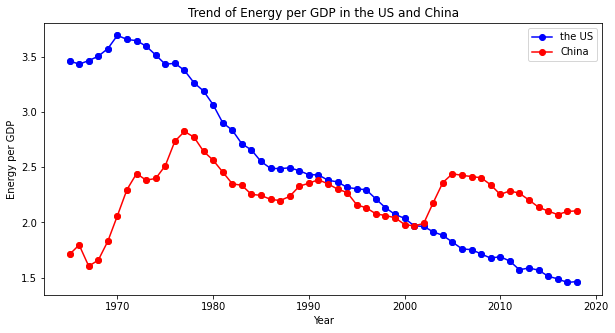

In [55]:
df_USY = df_US.loc[df_US['year'] >= 1950]
df_CNY = df_CN.loc[df_CN['year'] >= 1950]
%matplotlib inline
plt.figure(figsize=(10, 5))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df_USY.year, df_USY.energy_per_gdp)
plt.scatter(df_CNY.year, df_CNY.energy_per_gdp)

# give a title to the plot
plt.title('Trend of Energy per GDP in the US and China')

# give a label to the axes
plt.ylabel("Energy per GDP")
plt.xlabel("Year")
plt.plot(df_USY.year, df_USY.energy_per_gdp, 'ob-', label = "the US")
plt.plot(df_CNY.year, df_CNY.energy_per_gdp, 'or-', label = "China")
plt.legend()
plt.show()



# 4 Predicting missing values with Linear Regression

The above code enables us to make use of the data available to make them speak and tell us more their raw form does. 

However, missing values make the results slightly inaccurate. 

Using machine learning and in particular linear regression, it is possible to predict with sufficient accuracy what the missing values are, based on the values available. The accuracy is never equal to 100%, but it still provides a better accuracy of results overall. 

In this part part, we are going to use one method to predict the missing values of some variables based on data available. 

In [56]:
import sklearn
from sklearn import linear_model

In [57]:
df_USY2 = df_US.loc[df_US['year'] >= 1980]

df_CNY2 = df_CN.loc[df_CN['year'] >= 1980]

In [58]:
ML_US = df_USY2[['year','co2','gdp', 'trade_co2', 'total_ghg']]

In [59]:
print(ML_US.isnull().sum())

year          0
co2           0
gdp           2
trade_co2    11
total_ghg    12
dtype: int64


We can see that gdp, trade_co2 and total_ghg have NaN values. 

Using Linear Regression, it is possible to predict these missing values based on machine learning. 

Although, this technique can only predict NAN values of a column based on the values of other columns which must not be NAN, and must be integers. 

Because of that, we are going to predict gdp values based on year and co2 first. Then, we are going to predict trade_co2 based on year, co2 AND gdp. The same applies for the last variable: total_ghg. 

In [60]:
#update our dataframe so that only gdp has NAN values (the ones we are going to predict)
ML_US = df_USY2[['year','co2','gdp']]

In [61]:
#values must be integers
ML_US.astype(int, errors='ignore')

,year,co2,gdp
24621,1980,4808.296,6.743208e+12
24622,1981,4686.172,6.911865e+12
24623,1982,4447.080,6.782207e+12
24624,1983,4429.187,7.066237e+12
24625,1984,4661.921,7.581108e+12
24626,1985,4652.383,7.874872e+12
24627,1986,4663.165,8.146028e+12
24628,1987,4825.445,8.432567e+12
24629,1988,5050.268,8.787203e+12
24630,1989,5131.927,9.091291e+12


In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

testdf = ML_US[ML_US['gdp'].isnull()==True]
traindf = ML_US[ML_US['gdp'].isnull()==False]

y = traindf['gdp']

traindf.drop("gdp",axis=1,inplace=True)

lr.fit(traindf, y)

testdf.drop("gdp",axis=1,inplace=True)

pred = lr.predict(testdf)

testdf["gdp"] = pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
print(pred)

[1.79628537e+13 1.79647572e+13]


In [64]:
#replace NAN values with our predictions
ML_US.loc[np.isnan(ML_US["gdp"]), 'gdp'] = pred

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [65]:
#rows 24660 and 24661 are now filled in
print(ML_US)

       year       co2           gdp
24621  1980  4808.296  6.743208e+12
24622  1981  4686.172  6.911865e+12
24623  1982  4447.080  6.782207e+12
24624  1983  4429.187  7.066237e+12
24625  1984  4661.921  7.581108e+12
24626  1985  4652.383  7.874872e+12
24627  1986  4663.165  8.146028e+12
24628  1987  4825.445  8.432567e+12
24629  1988  5050.268  8.787203e+12
24630  1989  5131.927  9.091291e+12
24631  1990  5113.455  9.250378e+12
24632  1991  5057.931  9.243499e+12
24633  1992  5167.481  9.572148e+12
24634  1993  5267.343  9.834941e+12
24635  1994  5358.824  1.023202e+13
24636  1995  5421.502  1.051026e+13
24637  1996  5610.582  1.090917e+13
24638  1997  5686.465  1.139876e+13
24639  1998  5731.050  1.190603e+13
24640  1999  5804.669  1.246382e+13
24641  2000  6010.508  1.297384e+13
24642  2001  5904.882  1.310047e+13
24643  2002  5946.771  1.333449e+13
24644  2003  6011.837  1.370881e+13
24645  2004  6114.007  1.422788e+13
24646  2005  6134.521  1.470373e+13
24647  2006  6051.668  1.509

In [66]:
#For new column, add trade_co2 and predict it based on other variables
ML_US = ML_US.join(df_USY2[('trade_co2')])

In [67]:
print(ML_US)

       year       co2           gdp  trade_co2
24621  1980  4808.296  6.743208e+12        NaN
24622  1981  4686.172  6.911865e+12        NaN
24623  1982  4447.080  6.782207e+12        NaN
24624  1983  4429.187  7.066237e+12        NaN
24625  1984  4661.921  7.581108e+12        NaN
24626  1985  4652.383  7.874872e+12        NaN
24627  1986  4663.165  8.146028e+12        NaN
24628  1987  4825.445  8.432567e+12        NaN
24629  1988  5050.268  8.787203e+12        NaN
24630  1989  5131.927  9.091291e+12        NaN
24631  1990  5113.455  9.250378e+12    -81.669
24632  1991  5057.931  9.243499e+12   -108.795
24633  1992  5167.481  9.572148e+12    -32.966
24634  1993  5267.343  9.834941e+12    -73.043
24635  1994  5358.824  1.023202e+13    -63.464
24636  1995  5421.502  1.051026e+13    -65.028
24637  1996  5610.582  1.090917e+13    -84.119
24638  1997  5686.465  1.139876e+13    -54.277
24639  1998  5731.050  1.190603e+13     64.578
24640  1999  5804.669  1.246382e+13    156.686
24641  2000  

In [68]:
#predict NAN values of trade_co2 based on year, co2 and gdp.
testdf = ML_US[ML_US['trade_co2'].isnull()==True]
traindf = ML_US[ML_US['trade_co2'].isnull()==False]

y = traindf['trade_co2']

traindf.drop("trade_co2",axis=1,inplace=True)

lr.fit(traindf, y)

testdf.drop("trade_co2",axis=1,inplace=True)

pred2 = lr.predict(testdf)

testdf["trade_co2"] = pred2

print(pred2)

[-239.80889448 -262.96895862 -352.97299651 -341.80673623 -255.91463845
 -241.91533607 -228.78939344 -191.31997284 -133.44308892 -104.61128166
  272.508799  ]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel im

In [69]:
#replace NAN values with predictions
ML_US.loc[np.isnan(ML_US["trade_co2"]), 'trade_co2'] = pred2

print(ML_US['trade_co2'])

24621   -239.808894
24622   -262.968959
24623   -352.972997
24624   -341.806736
24625   -255.914638
24626   -241.915336
24627   -228.789393
24628   -191.319973
24629   -133.443089
24630   -104.611282
24631    -81.669000
24632   -108.795000
24633    -32.966000
24634    -73.043000
24635    -63.464000
24636    -65.028000
24637    -84.119000
24638    -54.277000
24639     64.578000
24640    156.686000
24641    245.382000
24642    258.874000
24643    338.908000
24644    368.517000
24645    446.305000
24646    461.753000
24647    543.504000
24648    487.787000
24649    398.956000
24650    317.275000
24651    322.376000
24652    402.329000
24653    375.604000
24654    323.361000
24655    300.350000
24656    327.918000
24657    328.696000
24658    343.021000
24659    351.120000
24660    369.967000
24661    272.508799
Name: trade_co2, dtype: float64


In [70]:
#Finally, for the last column
ML_US = ML_US.join(df_USY2[('total_ghg')])
print(ML_US)

       year       co2           gdp   trade_co2  total_ghg
24621  1980  4808.296  6.743208e+12 -239.808894        NaN
24622  1981  4686.172  6.911865e+12 -262.968959        NaN
24623  1982  4447.080  6.782207e+12 -352.972997        NaN
24624  1983  4429.187  7.066237e+12 -341.806736        NaN
24625  1984  4661.921  7.581108e+12 -255.914638        NaN
24626  1985  4652.383  7.874872e+12 -241.915336        NaN
24627  1986  4663.165  8.146028e+12 -228.789393        NaN
24628  1987  4825.445  8.432567e+12 -191.319973        NaN
24629  1988  5050.268  8.787203e+12 -133.443089        NaN
24630  1989  5131.927  9.091291e+12 -104.611282        NaN
24631  1990  5113.455  9.250378e+12  -81.669000    5543.47
24632  1991  5057.931  9.243499e+12 -108.795000    5501.92
24633  1992  5167.481  9.572148e+12  -32.966000    5583.80
24634  1993  5267.343  9.834941e+12  -73.043000    5691.26
24635  1994  5358.824  1.023202e+13  -63.464000    5782.20
24636  1995  5421.502  1.051026e+13  -65.028000    5843.

In [71]:
#predict NAN values of total_ghg based on year, co2, gdp and trade_co2
testdf = ML_US[ML_US['total_ghg'].isnull()==True]
traindf = ML_US[ML_US['total_ghg'].isnull()==False]

y = traindf['total_ghg']

traindf.drop("total_ghg",axis=1,inplace=True)

lr.fit(traindf, y)

testdf.drop("total_ghg",axis=1,inplace=True)

pred3 = lr.predict(testdf)

testdf["total_ghg"] = pred3

print(pred3)

[5461.38664818 5338.08559541 5092.60733427 5068.43794419 5279.6184847
 5263.42679389 5263.64102496 5398.0803336  5591.92957598 5656.60602814
 5547.37923285 5030.97650445]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel im

In [72]:
#replace total_ghg NAN values with predictions
ML_US.loc[np.isnan(ML_US["total_ghg"]), 'total_ghg'] = pred3

print(ML_US['total_ghg'])

24621    5461.386648
24622    5338.085595
24623    5092.607334
24624    5068.437944
24625    5279.618485
24626    5263.426794
24627    5263.641025
24628    5398.080334
24629    5591.929576
24630    5656.606028
24631    5543.470000
24632    5501.920000
24633    5583.800000
24634    5691.260000
24635    5782.200000
24636    5843.900000
24637    6010.620000
24638    6258.470000
24639    6293.800000
24640    6291.250000
24641    6446.200000
24642    6406.040000
24643    6246.950000
24644    6306.120000
24645    6387.220000
24646    6401.120000
24647    6306.810000
24648    6397.670000
24649    6220.210000
24650    5793.660000
24651    6041.590000
24652    5796.780000
24653    5550.870000
24654    5690.790000
24655    5711.150000
24656    5586.690000
24657    5676.920000
24658    5613.640000
24659    5794.350000
24660    5547.379233
24661    5030.976504
Name: total_ghg, dtype: float64


In [73]:
print(ML_US)

       year       co2           gdp   trade_co2    total_ghg
24621  1980  4808.296  6.743208e+12 -239.808894  5461.386648
24622  1981  4686.172  6.911865e+12 -262.968959  5338.085595
24623  1982  4447.080  6.782207e+12 -352.972997  5092.607334
24624  1983  4429.187  7.066237e+12 -341.806736  5068.437944
24625  1984  4661.921  7.581108e+12 -255.914638  5279.618485
24626  1985  4652.383  7.874872e+12 -241.915336  5263.426794
24627  1986  4663.165  8.146028e+12 -228.789393  5263.641025
24628  1987  4825.445  8.432567e+12 -191.319973  5398.080334
24629  1988  5050.268  8.787203e+12 -133.443089  5591.929576
24630  1989  5131.927  9.091291e+12 -104.611282  5656.606028
24631  1990  5113.455  9.250378e+12  -81.669000  5543.470000
24632  1991  5057.931  9.243499e+12 -108.795000  5501.920000
24633  1992  5167.481  9.572148e+12  -32.966000  5583.800000
24634  1993  5267.343  9.834941e+12  -73.043000  5691.260000
24635  1994  5358.824  1.023202e+13  -63.464000  5782.200000
24636  1995  5421.502  1